 <div style="text-align:center;">
  <span style="color:green; font-size:2em; font-weight:bold;">Visualisation</span><br><br>

Dans cette partie nous allons nous interesser à la visualisation de nos données. Pour les taux de chômage et de croissance, nous allons se concentrer uniquement sur les observations de la période s'étallant de **2019** à **2023**. Nous voulons à partir de cela visualiser les niveaux moyens de chomage et de croissance économique pour les cinq dernières années.
L'objectif ici est de mettre en pratique les méthodes vues en cours.

**Précision :**

Pour la représentation graphique des séries temporelles, la période considérée est celle s'étallant de **1994** à **2023**.

# <span style="color:green">I. Taux de chômage à travers le monde</span><br><br> 

In [1]:
# Importation des packages nécessaires
import declarations as d 

c:\Projet-Python\monmodule\declarations.py:23: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
c:\Projet-Python\monmodule\declarations.py:24: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
c:\Projet-Python\monmodule\declarations.py:26: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table


In [2]:
# Importation de la DF construite initialement dans le fichier "Préparation_données_copy.ipynb"
final_data= d.pd.read_csv('C:/Projet-Python/monmodule/bases/final_data.csv', index_col=0)

In [3]:
# Visualisation
final_data.head()

,COUNTRY,Unemployment_rate,GDP_rate,life_expentancy,pop_growth_rate
YEAR,,,,,
1994-01,AUS,9.814137,0.501645,77.878049,0.963092
1994-01,SVN,14.650000,0.748256,73.404878,-0.115694
1994-01,CAN,10.700000,0.680429,77.871707,1.095258
1994-01,AUT,6.609708,0.779464,76.419512,0.384870
1994-01,PHL,9.450000,0.329061,67.942000,2.343515


Nous allons à ce stade tronquer la Dataframe df_Unemployement, pour ne garder que les années à partir de 2019.

In [4]:
# Tronquer la DataFrame pour garder uniquement les lignes à partir de 2019
df_tronque = final_data.loc[final_data.index >= '2019']

# Afficher la DataFrame tronquée
df_tronque.head()

,COUNTRY,Unemployment_rate,GDP_rate,life_expentancy,pop_growth_rate
YEAR,,,,,
2019-01,LKA,4.600000,NaN,NaN,NaN
2019-01,PHL,5.475000,1.001567,71.865000,1.655184
2019-01,CZE,2.150000,1.081050,79.229268,0.393789
2019-01,USA,3.825000,1.033740,78.787805,0.455381
2019-01,SWE,6.659532,0.898078,83.109756,1.013722


Nous calculons la moyenne des taux de chômage sur la période considérée (2019-2023)

In [5]:
# Calculer la moyenne des taux de chomage sur la période considérée
unemployment_mean =  df_tronque.groupby('COUNTRY')['Unemployment_rate'].mean().reset_index()

In [6]:
# Visualisation
unemployment_mean.head(5)

,COUNTRY,Unemployment_rate
0,AUS,5.063088
1,AUT,7.857682
2,BEL,5.699012
3,BGR,5.739069
4,CAN,6.985294


## <span style="color:green">I.1. Diagramme à batons du taux de chomage moyen </span><br><br> 

In [7]:

# Assurez-vous que votre colonne 'COUNTRY' est de type catégorie
unemployment_mean['COUNTRY'] = unemployment_mean['COUNTRY'].astype('category')

# Créez un graphique interactif avec Plotly Express
fig = d.px.bar(unemployment_mean, x='COUNTRY', y='Unemployment_rate', color='COUNTRY',
             labels={'COUNTRY': 'Pays', 'Unemployment_rate': 'Taux de chômage moyen'},
             title='Taux de chômage moyen par pays sur la période 2019-2023',
             template='plotly_dark')

# Affichez le graphique interactif
fig.show()

C:\Users\yousr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


## <span style="color:green">I.2. Carte interactive : cartes choroplèthes  </span><br><br>  

Une carte choroplèthe est une carte composée de polygones colorés. Elle est utilisée pour représenter les variations spatiales d’une quantité.
Précisemment, nous optons ici pour la carte choroplèthe **px.choropleth** de la bibliothèque **Plotly Express**, cette dernière étant plus adapté aux notebooks jupyter.

Pour obtenir des données spatiale sur les pays de nos Dataframes, nous allons recourir au jeu de données **"naturalearth_lowres"** fourni par GeoPandas.

Les méthodes utilisées ici sont essentiellement ceux des bibliothèques **geopandas** et **plotly**.

In [8]:
# Import des packages 
import declarations as d
import geopandas as gpd

In [9]:
# Recours au jeu de données "naturalearth_lowres"
world = d.gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\yousr\AppData\Local\Temp\ipykernel_2744\2546529362.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [10]:
# Transformation
world.to_crs('EPSG:4326') # Transformer les coordonnées géographiques en coordonnées projetées.

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
# Visualisation
world.head(20)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


Nous nous intéressons essentiellement aux colonnes suivantes du jeu de données "naturalearth_lowres" (la Dataframe "World") : 
     <div style="margin-left: 20px;">
    -name : Nom des pays. <br>
    -iso_a3 : Code ISO 3 des pays. <br>
    -geometry : Colonne géométrique contenant les frontières des pays
    </div>

Ensuite nous procédons à une jointure entre la DF "World" et la DF "unemployment_mean". La jointure se fait sur la colonne "iso_a3" de la DF "World" et la colonne "Country" de la DF "unemployment_mean".

In [12]:
# Jointure
merged = gpd.GeoDataFrame(d.pd.merge(world, unemployment_mean, left_on='iso_a3', right_on='COUNTRY', how='left'))

In [13]:
# Visualisation de la jointure
merged.tail(100)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,COUNTRY,Unemployment_rate
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",NaN,NaN
78,26969307.0,Africa,Madagascar,MDG,14114,"POLYGON ((49.54352 -12.46983, 49.80898 -12.895...",NaN,NaN
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",NaN,NaN
80,2347706.0,Africa,Gambia,GMB,1826,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",NaN,NaN
81,11694719.0,Africa,Tunisia,TUN,38796,"POLYGON ((9.48214 30.30756, 9.05560 32.10269, ...",NaN,NaN
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


In [14]:
# Créer une carte centrée sur la position moyenne des pays
# Obtenez les limites totales des géométries reprojeter
bounds = merged.geometry.total_bounds

# Calculer le centre
map_center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]

# Utiliser Plotly Express pour créer la carte choroplèthe
fig = d.px.choropleth(
    merged,
    geojson=merged.geometry,
    locations=merged.index,
    color='Unemployment_rate',
    color_continuous_scale="Viridis",
    range_color=(merged['Unemployment_rate'].min(), merged['Unemployment_rate'].max()),
    labels={'Unemployment mean': 'Unemployment Rate (%)', 'name': 'Country'},
    title='Taux de chômage moyen par pays sur la période 2019-2023',
    hover_name='name'
)

# Ajouter une couche choroplèthe à la carte
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout ( margin = { "r" : 0 , "t" : 0 , "l" : 0 , "b" : 0 }) 

# Afficher la carte interactive
fig.show()

## A VOIR 

In [15]:
import folium

# Créer une carte folium centrée sur la position moyenne des pays
bounds = merged.geometry.total_bounds

# Calculer le centre
map_center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]
mymap = folium.Map(location=map_center, zoom_start=2)

# Ajouter une couche choroplèthe avec les taux de chômage
folium.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=["name", 'Unemployment_rate'],
    key_on='feature.properties.iso_a3',
    fill_color="BuPu",
    fill_opacity=0.2,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(mymap)

# Ajouter des popups pour afficher les taux de chômage
for idx, row in merged.iterrows():
    # Add Marker only if Unemployment rate is not NaN
    if not d.pd.isna(row['Unemployment_rate']):
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=f"{row['name']}<br>Unemployment Rate: {row['Unemployment_rate']}",
            icon=folium.Icon(icon='star', color='green')
        ).add_to(mymap)

# Afficher la carte interactive
mymap

## <span style="color:green">I.3. Carte statique </span><br><br> 

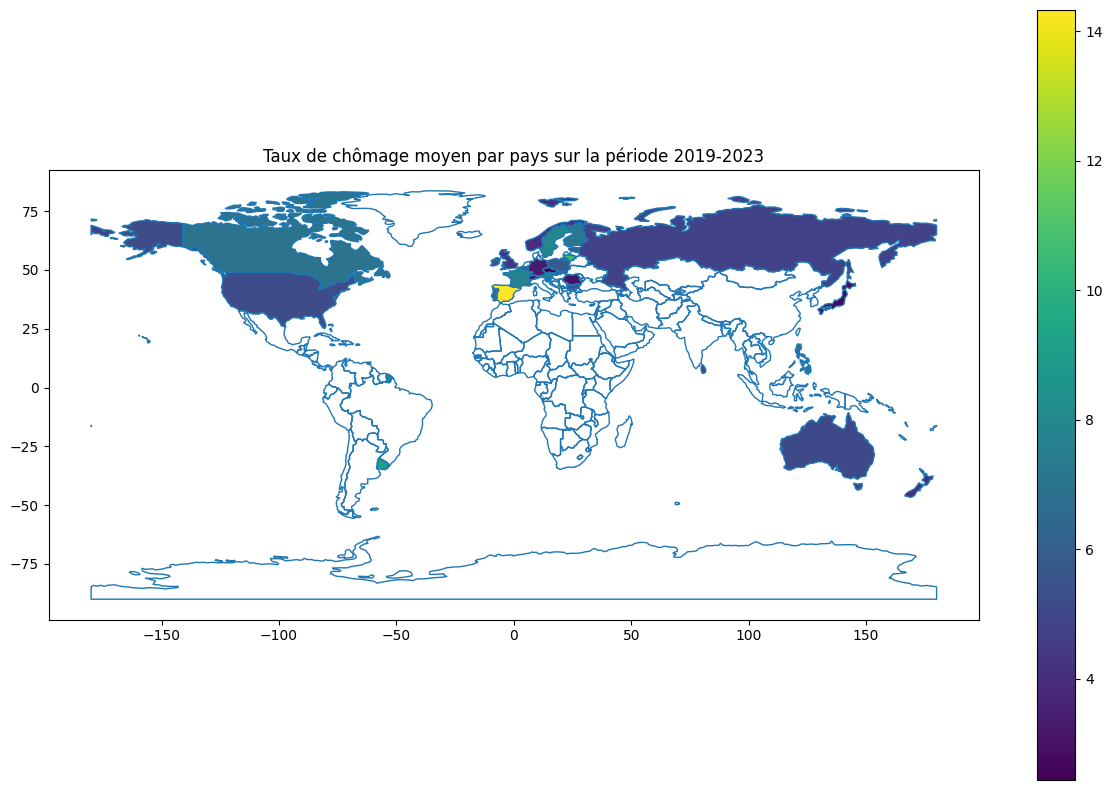

In [16]:
# Créer une carte centrée sur la position moyenne des pays
bounds = merged.geometry.total_bounds
map_center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]

# Créer la figure et les axes
fig, ax = d.plt.subplots(figsize=(15, 10))

# Tracer les frontières des pays
merged.boundary.plot(ax=ax, linewidth=1)

# Tracer les polygones des pays avec des couleurs basées sur le taux de chômage
merged.plot(column='Unemployment_rate', cmap='viridis', ax=ax, legend=True)

# Ajouter un titre et une légende
d.plt.title('Taux de chômage moyen par pays sur la période 2019-2023')
d.plt.show()

## <span style="color:green">I.4. Séries temporelles  </span><br><br>

In [17]:
# Visualisation
final_data.head(5)

,COUNTRY,Unemployment_rate,GDP_rate,life_expentancy,pop_growth_rate
YEAR,,,,,
1994-01,AUS,9.814137,0.501645,77.878049,0.963092
1994-01,SVN,14.650000,0.748256,73.404878,-0.115694
1994-01,CAN,10.700000,0.680429,77.871707,1.095258
1994-01,AUT,6.609708,0.779464,76.419512,0.384870
1994-01,PHL,9.450000,0.329061,67.942000,2.343515


In [18]:
# S'assurer que l'index est de type date
final_data.index = d.pd.to_datetime(final_data.index)

# Créer un graphe interactif pour les séries temporelles avec Plotly Express
fig = d.px.line(final_data.Unemployment_rate, x=final_data.index, y=final_data.Unemployment_rate, color=final_data.COUNTRY,
              labels={'index': 'Date', 'Unemployment_rate': 'Unemployment Rate'},
              title='Série temporelle du taux de chômage par pays',
              template='plotly_dark')

# Afficher le plot interactif
fig.show()

# <span style="color:green">II. Croissance économique à travers le monde</span><br><br> 

In [19]:
# Calculer la moyenne des taux de chomage sur la période considérée
gdp_mean = df_tronque.groupby('COUNTRY')['GDP_rate'].mean().reset_index()

In [20]:
# Visualisation
gdp_mean.head(5)

,COUNTRY,GDP_rate
0,AUS,1.029390
1,AUT,1.116826
2,BEL,1.125821
3,BGR,1.344580
4,CAN,1.174125


## <span style="color:green">II.1. Diagramme à batons du taux moyen de croissance du PIB</span><br><br> 

In [21]:
# Assurez-vous que votre colonne 'COUNTRY' est de type catégorie
gdp_mean['COUNTRY'] = gdp_mean['COUNTRY'].astype('category')

# Créez un graphique interactif avec Plotly Express
fig = d.px.bar(gdp_mean, x='COUNTRY', y='GDP_rate', color='COUNTRY',
             labels={'COUNTRY': 'Pays', 'GDP_rate': 'Taux moyen de croissance du PIB'},
             title='Taux moyen de croissance du PIB par pays sur la période 2019-2023',
             template='plotly_dark')

# Affichez le graphique interactif
fig.show()

C:\Users\yousr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## <span style="color:green">II.2. Carte statique </span><br><br> 

## <span style="color:green">II.3. Carte interactive : cartes choroplèthes </span><br><br> 

In [22]:
# Jointure
merged1 = gpd.GeoDataFrame(d.pd.merge(world, gdp_mean, left_on='iso_a3', right_on='COUNTRY', how='left'))

In [23]:
# Visualisation de la jointure
merged1.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,COUNTRY,GDP_rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,1.174125
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,1.100790


In [24]:
# Créer une carte centrée sur la position moyenne des pays
bounds = merged1.geometry.total_bounds

# Calculer le centre
map_center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]

# Utiliser Plotly Express pour créer la carte choroplèthe
fig = d.px.choropleth(
    merged1,
    geojson=merged1.geometry,
    locations=merged1.index,
    color='GDP_rate',
    color_continuous_scale="Viridis",
    range_color=(merged1['GDP_rate'].min(), merged1['GDP_rate'].max()),
    labels={'GDP_rate': 'GDP Rate (%)', 'name': 'Country'},
    title='Economic growth Rate by Country',
    hover_name='name'
)

# Ajouter une couche choroplèthe à la carte
fig.update_geos(fitbounds="locations", visible=True)

fig.update_layout ( margin = { "r" : 0 , "t" : 0 , "l" : 0 , "b" : 0 }) 

# Afficher la carte interactive
fig.show()

## <span style="color:green">II.4. Séries temporelles </span><br><br> 

In [25]:
# Visualisation
final_data.head(5)

,COUNTRY,Unemployment_rate,GDP_rate,life_expentancy,pop_growth_rate
YEAR,,,,,
1994-01-01,AUS,9.814137,0.501645,77.878049,0.963092
1994-01-01,SVN,14.650000,0.748256,73.404878,-0.115694
1994-01-01,CAN,10.700000,0.680429,77.871707,1.095258
1994-01-01,AUT,6.609708,0.779464,76.419512,0.384870
1994-01-01,PHL,9.450000,0.329061,67.942000,2.343515


In [26]:
import pandas as pd
import plotly.express as px

# S'assurer que l'index est de type date
final_data.index = pd.to_datetime(final_data.index)

# Supprimer les valeurs manquantes et trier par index
final_data_cleaned = final_data.dropna().sort_index()

# Créer un graphe interactif pour les séries temporelles avec Plotly Express
fig = px.line(final_data_cleaned, x=final_data_cleaned.index, y='GDP_rate', color='COUNTRY',
              labels={'index': 'Date', 'GDP_rate': 'GDP Rate'},
              title='Série temporelle du taux de croissance du PIB par pays',
              template='plotly_dark')

# Lier l'axe des y à l'axe des x pour éviter l'apparence discontinue
fig.update_layout(yaxis=dict(scaleanchor='x'))

# Afficher le plot interactif
fig.show()
